(cell_classification.object_classification)=
# Object classification on OpenCL-compatible GPUs
APOC is based on [pyclesperanto](https://github.com/clEsperanto/pyclesperanto_prototype) and [scikit-learn](https://scikit-learn.org/stable/). It allows classifying objects according to measured properties / features such as intensity, shape and number of neighboring cells.

In [7]:
import apoc

from skimage.io import imread, imsave
import pyclesperanto_prototype as cle
import numpy as np
import matplotlib.pyplot as plt

For object classification, we need an intensity image and a label image as input.

c:\Users\marqu\SynologyDrive\Drive\Aktivitäten\FORSCHUNG\Talk IBEC Barcelona\workshop_py\.venv\Lib\site-packages\pyclesperanto_prototype\_tier9\_imshow.py:35: UserWarning: cle.imshow is deprecated, use stackview.imshow instead.
  warnings.warn("cle.imshow is deprecated, use stackview.imshow instead.")
c:\Users\marqu\SynologyDrive\Drive\Aktivitäten\FORSCHUNG\Talk IBEC Barcelona\workshop_py\.venv\Lib\site-packages\pyclesperanto_prototype\_tier9\_imshow.py:49: UserWarning: The imshow parameter color_map is deprecated. Use colormap instead.
  warnings.warn("The imshow parameter color_map is deprecated. Use colormap instead.")


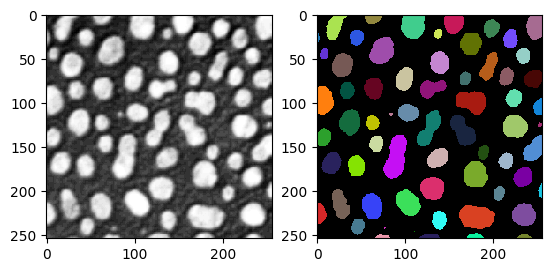

In [8]:
# load intensity image
image = imread('data/blobs.tif')

# segment the image
labels = cle.label(cle.threshold_otsu(image))

fig, axs = plt.subplots(1, 2)

cle.imshow(image, color_map="Greys_r", plot=axs[0])
cle.imshow(labels, labels=True, plot=axs[1])

## Training
We also need a ground truth annotation image. This image is also a label image with a sparse annotation. A line with value `1` was drawn through all objects that are supposed to belong to class `1`. A line with value `2` was drawn through all objects that should be classified as class `2`. If the line crosses the background, this is ignored. In this example, objects were annotated in three classes:
* Elongated objects
* Roundish objects
* Small objects

c:\Users\marqu\SynologyDrive\Drive\Aktivitäten\FORSCHUNG\Talk IBEC Barcelona\workshop_py\.venv\Lib\site-packages\pyclesperanto_prototype\_tier9\_imshow.py:35: UserWarning: cle.imshow is deprecated, use stackview.imshow instead.
  warnings.warn("cle.imshow is deprecated, use stackview.imshow instead.")


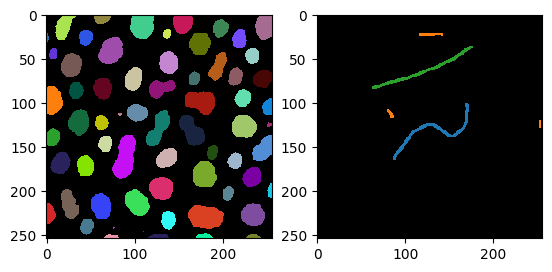

In [9]:
annotation = cle.push(imread('data/label_annotation.tif'))

fig, axs = plt.subplots(1, 2)

cle.imshow(labels, labels=True, plot=axs[0])
cle.imshow(annotation, labels=True, plot=axs[1])

Next, we need to define which features we want to use for classifying objects. We will use area, shape and the standard deviation of the intensity.

In [10]:
features = 'area mean_max_distance_to_centroid_ratio standard_deviation_intensity'

In [12]:
# Create an object classifier
filename = "data/blobs_object_classifier.cl"
classifier = apoc.ObjectClassifier(filename)

# train it; after training, it will be saved to the file specified above
classifier.train(features, labels, annotation, image)

After the classifier has been trained, we can use it immediately to predict the classification of the objects in the image.

c:\Users\marqu\SynologyDrive\Drive\Aktivitäten\FORSCHUNG\Talk IBEC Barcelona\workshop_py\.venv\Lib\site-packages\pyclesperanto_prototype\_tier9\_imshow.py:35: UserWarning: cle.imshow is deprecated, use stackview.imshow instead.
  warnings.warn("cle.imshow is deprecated, use stackview.imshow instead.")


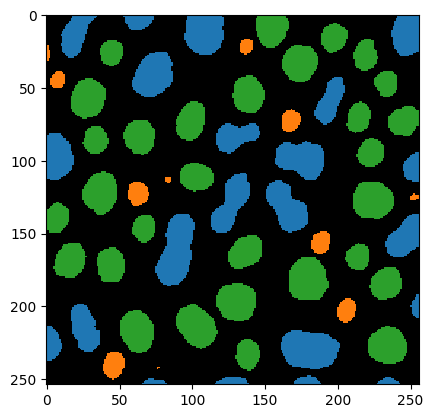

In [13]:
# determine object classification
classification_result = classifier.predict(labels, image)

cle.imshow(classification_result, labels=True)

## Prediction
You can also reload the classifier from disc and apply it to other images. We will simulate this by rotating the original image. This is by the way a good sanity check to see if the classification depends on the orientation of the image.

In [14]:
image2 = cle.rotate(image, angle_around_z_in_degrees=90)
labels2 = cle.rotate(labels, angle_around_z_in_degrees=90)

c:\Users\marqu\SynologyDrive\Drive\Aktivitäten\FORSCHUNG\Talk IBEC Barcelona\workshop_py\.venv\Lib\site-packages\pyclesperanto_prototype\_tier9\_imshow.py:35: UserWarning: cle.imshow is deprecated, use stackview.imshow instead.
  warnings.warn("cle.imshow is deprecated, use stackview.imshow instead.")


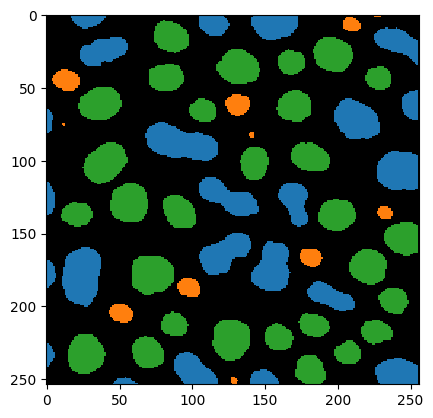

In [15]:
classifier2 = apoc.ObjectClassifier("data/blobs_object_classifier.cl")

classification_result2 = classifier2.predict(labels2, image2)

cle.imshow(classification_result2, labels=True)

## Available features for object classification
We can print out all available features . Parameters with a `?` expect a number at that position and can be specified multiple times with multiple values.

In [16]:
apoc.list_available_object_classification_features()

['label',
 'original_label',
 'bbox_min_x',
 'bbox_min_y',
 'bbox_min_z',
 'bbox_max_x',
 'bbox_max_y',
 'bbox_max_z',
 'bbox_width',
 'bbox_height',
 'bbox_depth',
 'min_intensity',
 'max_intensity',
 'sum_intensity',
 'area',
 'mean_intensity',
 'sum_intensity_times_x',
 'mass_center_x',
 'sum_intensity_times_y',
 'mass_center_y',
 'sum_intensity_times_z',
 'mass_center_z',
 'sum_x',
 'centroid_x',
 'sum_y',
 'centroid_y',
 'sum_z',
 'centroid_z',
 'sum_distance_to_centroid',
 'mean_distance_to_centroid',
 'sum_distance_to_mass_center',
 'mean_distance_to_mass_center',
 'standard_deviation_intensity',
 'max_distance_to_centroid',
 'max_distance_to_mass_center',
 'mean_max_distance_to_centroid_ratio',
 'mean_max_distance_to_mass_center_ratio',
 'touching_neighbor_count',
 'average_distance_of_touching_neighbors',
 'average_distance_of_n_nearest_neighbors=?',
 'average_distance_of_n_nearest_neighbors=?']